In [ ]:
import numpy as np
import torch
import torch.nn as nn

In [ ]:
model_path = '/content/drive/MyDrive/CNN_model_pth.pth'
model = torch.load(model_path)
model = torch.load(model_path, map_location=torch.device('cpu'))
print(model.keys())

print(model['conv1.weight'].shape)
print(model['conv1.bias'].shape)
print(model['fc1.weight'].shape)
print(model['fc1.bias'].shape)
print(model['fc2.weight'].shape)
print(model['fc2.bias'].shape)

odict_keys(['conv1.weight', 'conv1.bias', 'fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias'])
torch.Size([32, 1, 3, 3])
torch.Size([32])
torch.Size([64, 5408])
torch.Size([64])
torch.Size([10, 64])
torch.Size([10])


In [ ]:
model['conv1.weight'][0]

tensor([[[ 0.2076,  0.2212,  0.1997],
         [ 0.1345,  0.2045, -0.0268],
         [ 0.3595,  0.1840,  0.0400]]])

In [ ]:
model['fc1.weight'][0]

tensor([-0.0117,  0.0013, -0.0020,  ..., -0.0053,  0.0068,  0.0370])

In [ ]:
import numpy as np

def conv2d(x, weight, bias, stride=1):
    in_channels, _, filter_size, _ = weight.shape
    _, height, width = x.shape

    out_channels = weight.shape[0]
    out_height = (height - filter_size) // stride + 1
    out_width = (width - filter_size) // stride + 1

    out = np.zeros((out_channels, out_height, out_width))

    for k in range(out_channels):
        for i in range(0, height - filter_size + 1, stride):
            for j in range(0, width - filter_size + 1, stride):
                out[k, i//stride, j//stride] = np.sum(x[:, i:i+filter_size, j:j+filter_size] * weight[k].numpy()) + bias[k].numpy()

    return out

def relu(x):
    return np.maximum(x, 0)

def max_pooling(x, pool_size=2):
    channels, height, width = x.shape
    out_height = height // pool_size
    out_width = width // pool_size
    out = np.zeros((channels, out_height, out_width))

    for c in range(channels):
        for i in range(0, height, pool_size):
            for j in range(0, width, pool_size):
                out[c, i//pool_size, j//pool_size] = np.max(x[c, i:i+pool_size, j:j+pool_size])

    return out

def fully_connected(X, W, b):
    output_size = len(W)
    Z = [0] * output_size
    for i in range(output_size):
        Z[i] = sum(X[j] * W[i][j] for j in range(len(X))) + b[i]
    return Z



100%|██████████| 9912422/9912422 [00:00<00:00, 161640486.78it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 36464688.09it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 48567335.19it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 3870485.32it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



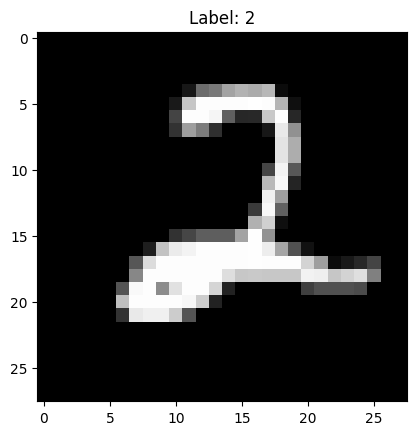

[[[-386.81510925 -386.81510925 -386.81510925 ... -386.81510925
   -386.81510925 -386.81510925]
  [-386.81510925 -386.81510925 -386.81510925 ... -386.81510925
   -386.81510925 -386.81510925]
  [-386.81510925 -386.81510925 -386.81510925 ... -386.81510925
   -386.81510925 -386.81510925]
  ...
  [-386.81510925 -386.81510925 -386.81510925 ... -386.81510925
   -386.81510925 -386.81510925]
  [-386.81510925 -386.81510925 -386.81510925 ... -386.81510925
   -386.81510925 -386.81510925]
  [-386.81510925 -386.81510925 -386.81510925 ... -386.81510925
   -386.81510925 -386.81510925]]

 [[-107.62593403 -107.62593403 -107.62593403 ... -107.62593403
   -107.62593403 -107.62593403]
  [-107.62593403 -107.62593403 -107.62593403 ... -107.62593403
   -107.62593403 -107.62593403]
  [-107.62593403 -107.62593403 -107.62593403 ... -107.62593403
   -107.62593403 -107.62593403]
  ...
  [-107.62593403 -107.62593403 -107.62593403 ... -107.62593403
   -107.62593403 -107.62593403]
  [-107.62593403 -107.62593403 -107.

In [ ]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
mnist_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

idx = np.random.randint(len(mnist_data))
image, label = mnist_data[idx]

plt.imshow(image.squeeze(), cmap='gray')
plt.title(f"Label: {label}")
plt.show()
image = image.numpy()

#print(image)

x = image
x = conv2d(x, model['conv1.weight'], model['conv1.bias'])
print(255*x)
print(x.shape)
x = relu(x)
x = max_pooling(x)
print(x.shape)
x = x.flatten()
print(x.shape)
x = fully_connected(x, model['fc1.weight'], model['fc1.bias'])
x = relu(x)
print(x.shape)
x = fully_connected(x, model['fc2.weight'], model['fc2.bias'])
print(len(x))
predicted_class = np.argmax(x)
print("Predicted class:", predicted_class)